In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [72]:
df=pd.read_csv(r"C:\Users\saurabh kumar\Desktop\Institute\DE\Tweets.csv")

In [73]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


In [74]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,5.695880e+17,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,22/02/2015 12:01,NaN,NaN
14636,5.695870e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,22/02/2015 11:59,Texas,NaN
14637,5.695870e+17,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,22/02/2015 11:59,"Nigeria,lagos",NaN
14638,5.695870e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,22/02/2015 11:59,New Jersey,Eastern Time (US & Canada)
14639,5.695870e+17,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,22/02/2015 11:58,"dallas, TX",NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [76]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791092e+14,0.162830,0.330440,0.745778
min,5.675880e+17,0.335000,0.000000,0.000000
25%,5.685590e+17,0.692300,0.360600,0.000000
50%,5.694780e+17,1.000000,0.670600,0.000000
75%,5.698902e+17,1.000000,1.000000,0.000000
max,5.703110e+17,1.000000,1.000000,44.000000


In [77]:
df.shape

(14640, 15)

In [78]:
df.duplicated().sum()

36

In [79]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [80]:
df.dtypes

tweet_id                        float64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [81]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

Q2:-There are three sentiment positive, negative & neutral. What is the average count of each
sentiment?


In [83]:
sentiment_counts = df['airline_sentiment'].value_counts()
average_count = sentiment_counts.mean()
print(sentiment_counts)
print(f'Average count of each sentiment: {average_count}')

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64
Average count of each sentiment: 4880.0


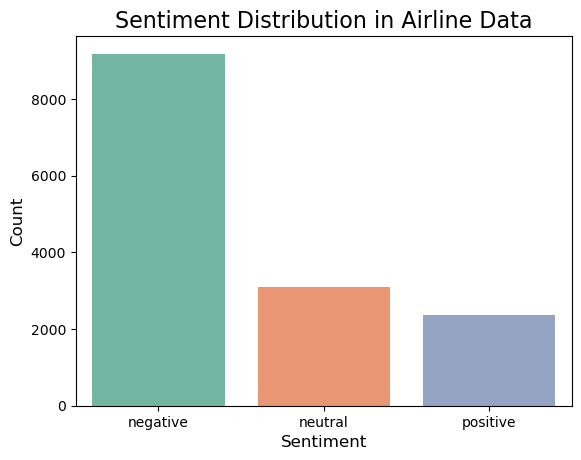

In [84]:
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values,hue=sentiment_counts.index, palette="Set2")
plt.title('Sentiment Distribution in Airline Data', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Q3:-What are some of thecommon negative feedbacks given?

In [86]:
negative_feedback = df[df['airline_sentiment'] == 'negative']
negative_reason_counts = negative_feedback['negativereason'].value_counts()
print(negative_reason_counts)

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


C:\Users\saurabh kumar\AppData\Local\Temp\ipykernel_19472\3985891384.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negative_reason_counts.index, y=negative_reason_counts.values, palette="viridis")


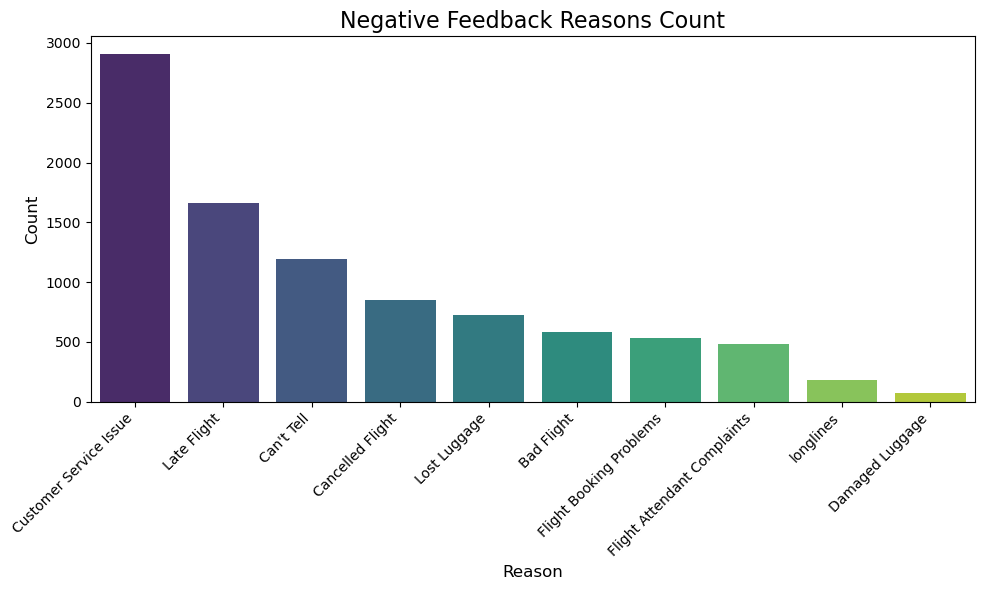

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(x=negative_reason_counts.index, y=negative_reason_counts.values, palette="viridis")
plt.title('Negative Feedback Reasons Count', fontsize=16)
plt.xlabel('Reason', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Q4:-How many different airlines are present in the dataset?

In [89]:
df['airline'].nunique()

6

In [90]:
flight_counts = df['airline'].value_counts()
print(flight_counts)

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


C:\Users\saurabh kumar\AppData\Local\Temp\ipykernel_19472\979531956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flight_counts.index, y=flight_counts.values, palette="viridis")


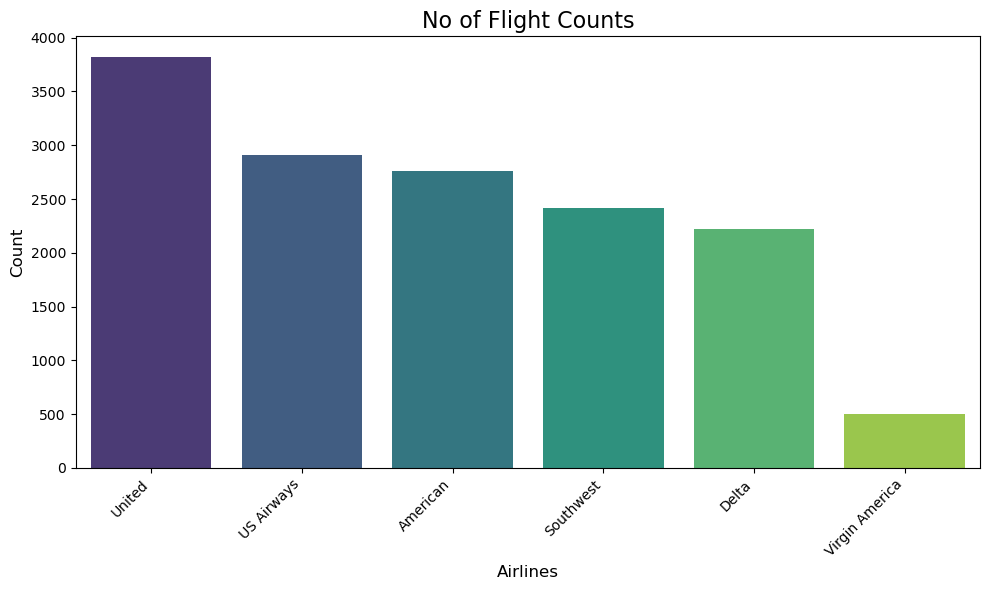

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x=flight_counts.index, y=flight_counts.values, palette="viridis")
plt.title('No of Flight Counts', fontsize=16)
plt.xlabel('Airlines', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Q5:-Could you generate the no. of sentiments of each airline from the data?

In [93]:
sentiment_counts = df.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)
sentiment_counts

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


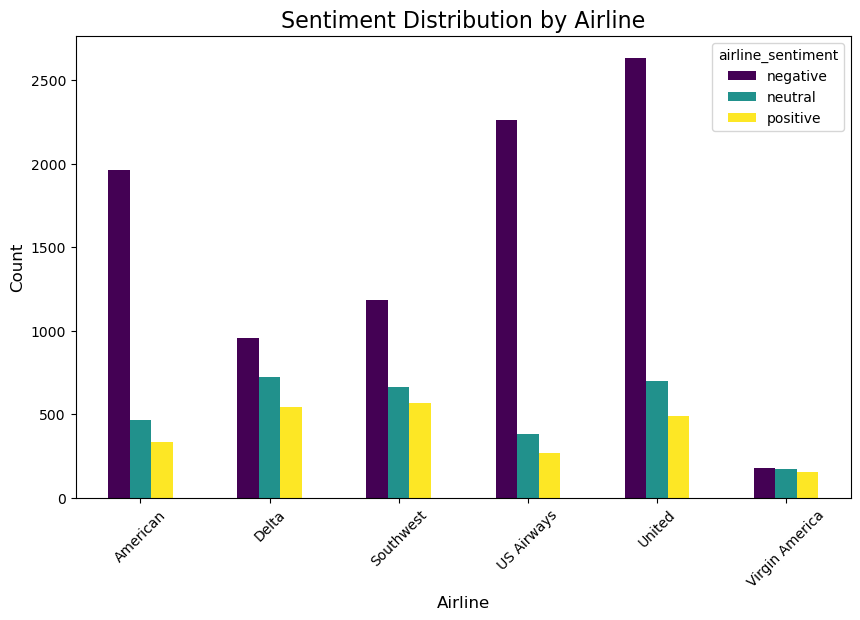

In [94]:
sentiment_counts.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Distribution by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Q6:-Which airline has the maximum negative sentiments?

In [96]:
negative_sentiments = df[df['airline_sentiment'] == 'negative']
negative_counts = negative_sentiments.groupby('airline').size()
max_negative_airline = negative_counts.idxmax()
max_negative_count = negative_counts.max()
print(max_negative_airline,max_negative_count)

United 2633


Q7:-What is the most common negative feedback given?

In [98]:
negative_feedback = df[df['airline_sentiment'] == 'negative']
negative_reason_counts = negative_feedback['negativereason'].value_counts()
print(negative_reason_counts.head(1))

negativereason
Customer Service Issue    2910
Name: count, dtype: int64


Q8:-Is there a specific day where a lot of negative feedbacks were given?

In [100]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
negative_sentiments = df[df['airline_sentiment'] == 'negative']
negative_by_day = negative_sentiments.groupby(negative_sentiments['tweet_created'].dt.date).size()
max_negative_day = negative_by_day.idxmax()
max_negative_count = negative_by_day.max()
print(max_negative_day ,max_negative_count)

2015-02-22 2266


C:\Users\saurabh kumar\AppData\Local\Temp\ipykernel_19472\3787238859.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['tweet_created'] = pd.to_datetime(df['tweet_created'])


From your analysis, which airline do you feel is doing the best?

In [102]:
sentiment_counts = df.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)
sentiment_counts

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [103]:
sentiment_counts['total'] = sentiment_counts.sum(axis=1)
sentiment_counts['positive_pct'] = sentiment_counts['positive'] / sentiment_counts['total'] * 100

In [104]:
best_airline = sentiment_counts['positive_pct'].idxmax()
best_airline_positive_pct = sentiment_counts['positive_pct'].max()

<Axes: ylabel='count'>

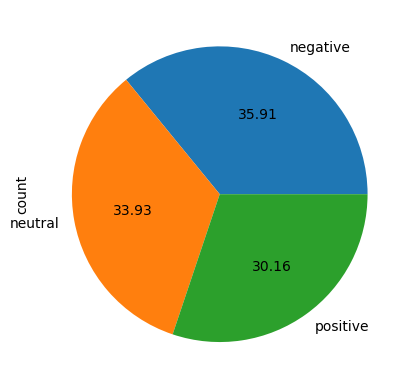

In [105]:
df[df['airline'] == 'Virgin America']['airline_sentiment'].value_counts().plot(kind = 'pie',autopct = '%.2f')

In [106]:
print(f"The best airline is {best_airline} and positive feedback = {best_airline_positive_pct:.2f}% .")

The best airline is Virgin America and positive feedback = 30.16% .
